# Homework 4


## By Team VC

### Text mining with Python

### Intro| Our corpus

For this week's homework, we are going to analyze text from the gutenburg library. The gutenburg library hosted thousands of text available, where we can use some literary classics for text mining. We used the NLTK package for the text mining and the retrieval of our selected book, Hamlet. Then, we spilt up the book into a list of all the words used in the text.

In [5]:
#Loading in our selected book witht the library given by NlTK
import nltk
import string
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import names, stopwords, words

nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('stopwords')
hamlet= nltk.corpus.gutenberg.words('shakespeare-hamlet.txt')

[nltk_data] Downloading package gutenberg to /Users/clee/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /Users/clee/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/clee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Unique Words in Hamlet

Unique words can be deemed by the frequency it is used in the text. We must removed all the common words used in a proper sentence, as these words distort the word frequency measurement. We loaded in a stop words list for the removal of all stop words from Hamelet. One note is Hamlet is in Shakespearn english, so we created a small stopwords list to remove the its own stopwords.

After the transformation, we curated a list of unique words from Hamelt. Our definition of unique is words of the lowest frequency in Hamelt. Shakespeare is well known for making up his own words, so majority of the unqiue words are his spellings of common words. For example, the word Leige is a resident ambassador in shakespearan. 

In [6]:
#import in the stop words list and use a lower() as its case sensitive for the for loop
#only included words that are not apart of the stop list 
r=stopwords.words('english')
clean_H=[n for n in hamlet if n.lower() not in r]


#Noticed stopwords python does not cover punctuation so brought in a puncutation list from String
clean_H=[n for n in clean_H if n not in string.punctuation]

#Created a small old english stopwords list to remove top useless words
Top=sorted(nltk.FreqDist(clean_H).items(),key=lambda x: x[1], reverse=True)
#print(Top[0:40])
old_eng={'thou','Oh','thy','thee','th','tis'}
clean_H=[n for n in clean_H if n.lower() not in old_eng]
ch=[n.lower() for n in clean_H]
ch=nltk.FreqDist(ch)

#only want a list of words with a frequency of one
Unique=list(filter(lambda x: x[1]<2,ch.items()))
total_u=len(Unique)
print(f'There is a total of {total_u} unique words')

#ignore the top 3 as it was the author's name and published year
print('Here are the top twenty words')
print(Unique[0:21])

There is a total of 2846 unique words
Here are the top twenty words
[('william', 1), ('shakespeare', 1), ('1599', 1), ('primus', 1), ('scoena', 1), ('prima', 1), ('centinels', 1), ('carefully', 1), ('strook', 1), ('releefe', 1), ('stirring', 1), ('riuals', 1), ('leige', 1), ('farwel', 1), ('relieu', 1), ('fra', 1), ('holla', 1), ('beleefe', 1), ('dreaded', 1), ('intreated', 1), ('minutes', 1)]


### Calculating the % of unique words from the total

We created a seperate words list which removed all the unique words from the original list for the calculation. Then, we can take the total count of the unique from the overall population for the results. The results show the total unique word count makes up 22% of the total word count.

In [7]:
import numpy as np
#convert the tuple into a single arrray with the unique words
uni_words= np.array(Unique)[:,0]

#Total words without uniques
wo_unis=[n for n in clean_H if n.lower() not in uni_words]
total_L=len(wo_unis)
per_uni=total_u/total_L
p='The total unique words make up {:%} of the Total words in Hamlet'
print(p.format(per_uni))

The total unique words make up 22.453649% of the Total words in Hamlet


### Highest Frequency words in Halmet

We have created a list of the highest frequency words in hamlet call top_200. Top_200 is display below with the words and their count in the text.

In [8]:
import matplotlib.pyplot as plt
#Gathe the top 200 frequent words
top_200=ch.most_common(200)
print(top_200)

[('ham', 337), ('lord', 211), ('haue', 178), ('king', 172), ('shall', 107), ('come', 104), ('let', 104), ('hamlet', 100), ('good', 98), ('hor', 95), ('enter', 85), ('oh', 81), ('like', 80), ('would', 73), ('well', 71), ('know', 71), ('selfe', 68), ('loue', 66), ('may', 65), ('vs', 64), ('sir', 62), ('qu', 62), ('laer', 60), ('giue', 59), ('ile', 58), ('must', 58), ('hath', 57), ('ophe', 56), ('speake', 55), ('make', 54), ('vpon', 52), ('say', 52), ('doe', 51), ('heere', 50), ('father', 50), ('pol', 49), ('see', 48), ('go', 48), ('one', 46), ('man', 46), ('heauen', 44), ('time', 44), ('mine', 44), ('much', 43), ('thinke', 43), ('tell', 43), ('play', 43), ('rosin', 43), ('thus', 41), ('horatio', 40), ('mother', 40), ('queene', 39), ('night', 38), ('polon', 38), ('death', 37), ('yet', 37), ('vp', 36), ('laertes', 35), ('againe', 34), ('life', 33), ('soule', 33), ('take', 32), ('heare', 31), ('mar', 31), ('looke', 31), ('owne', 31), ('could', 31), ('heart', 30), ('dead', 30), ('might', 30)

### Relative frequency of Hamlet

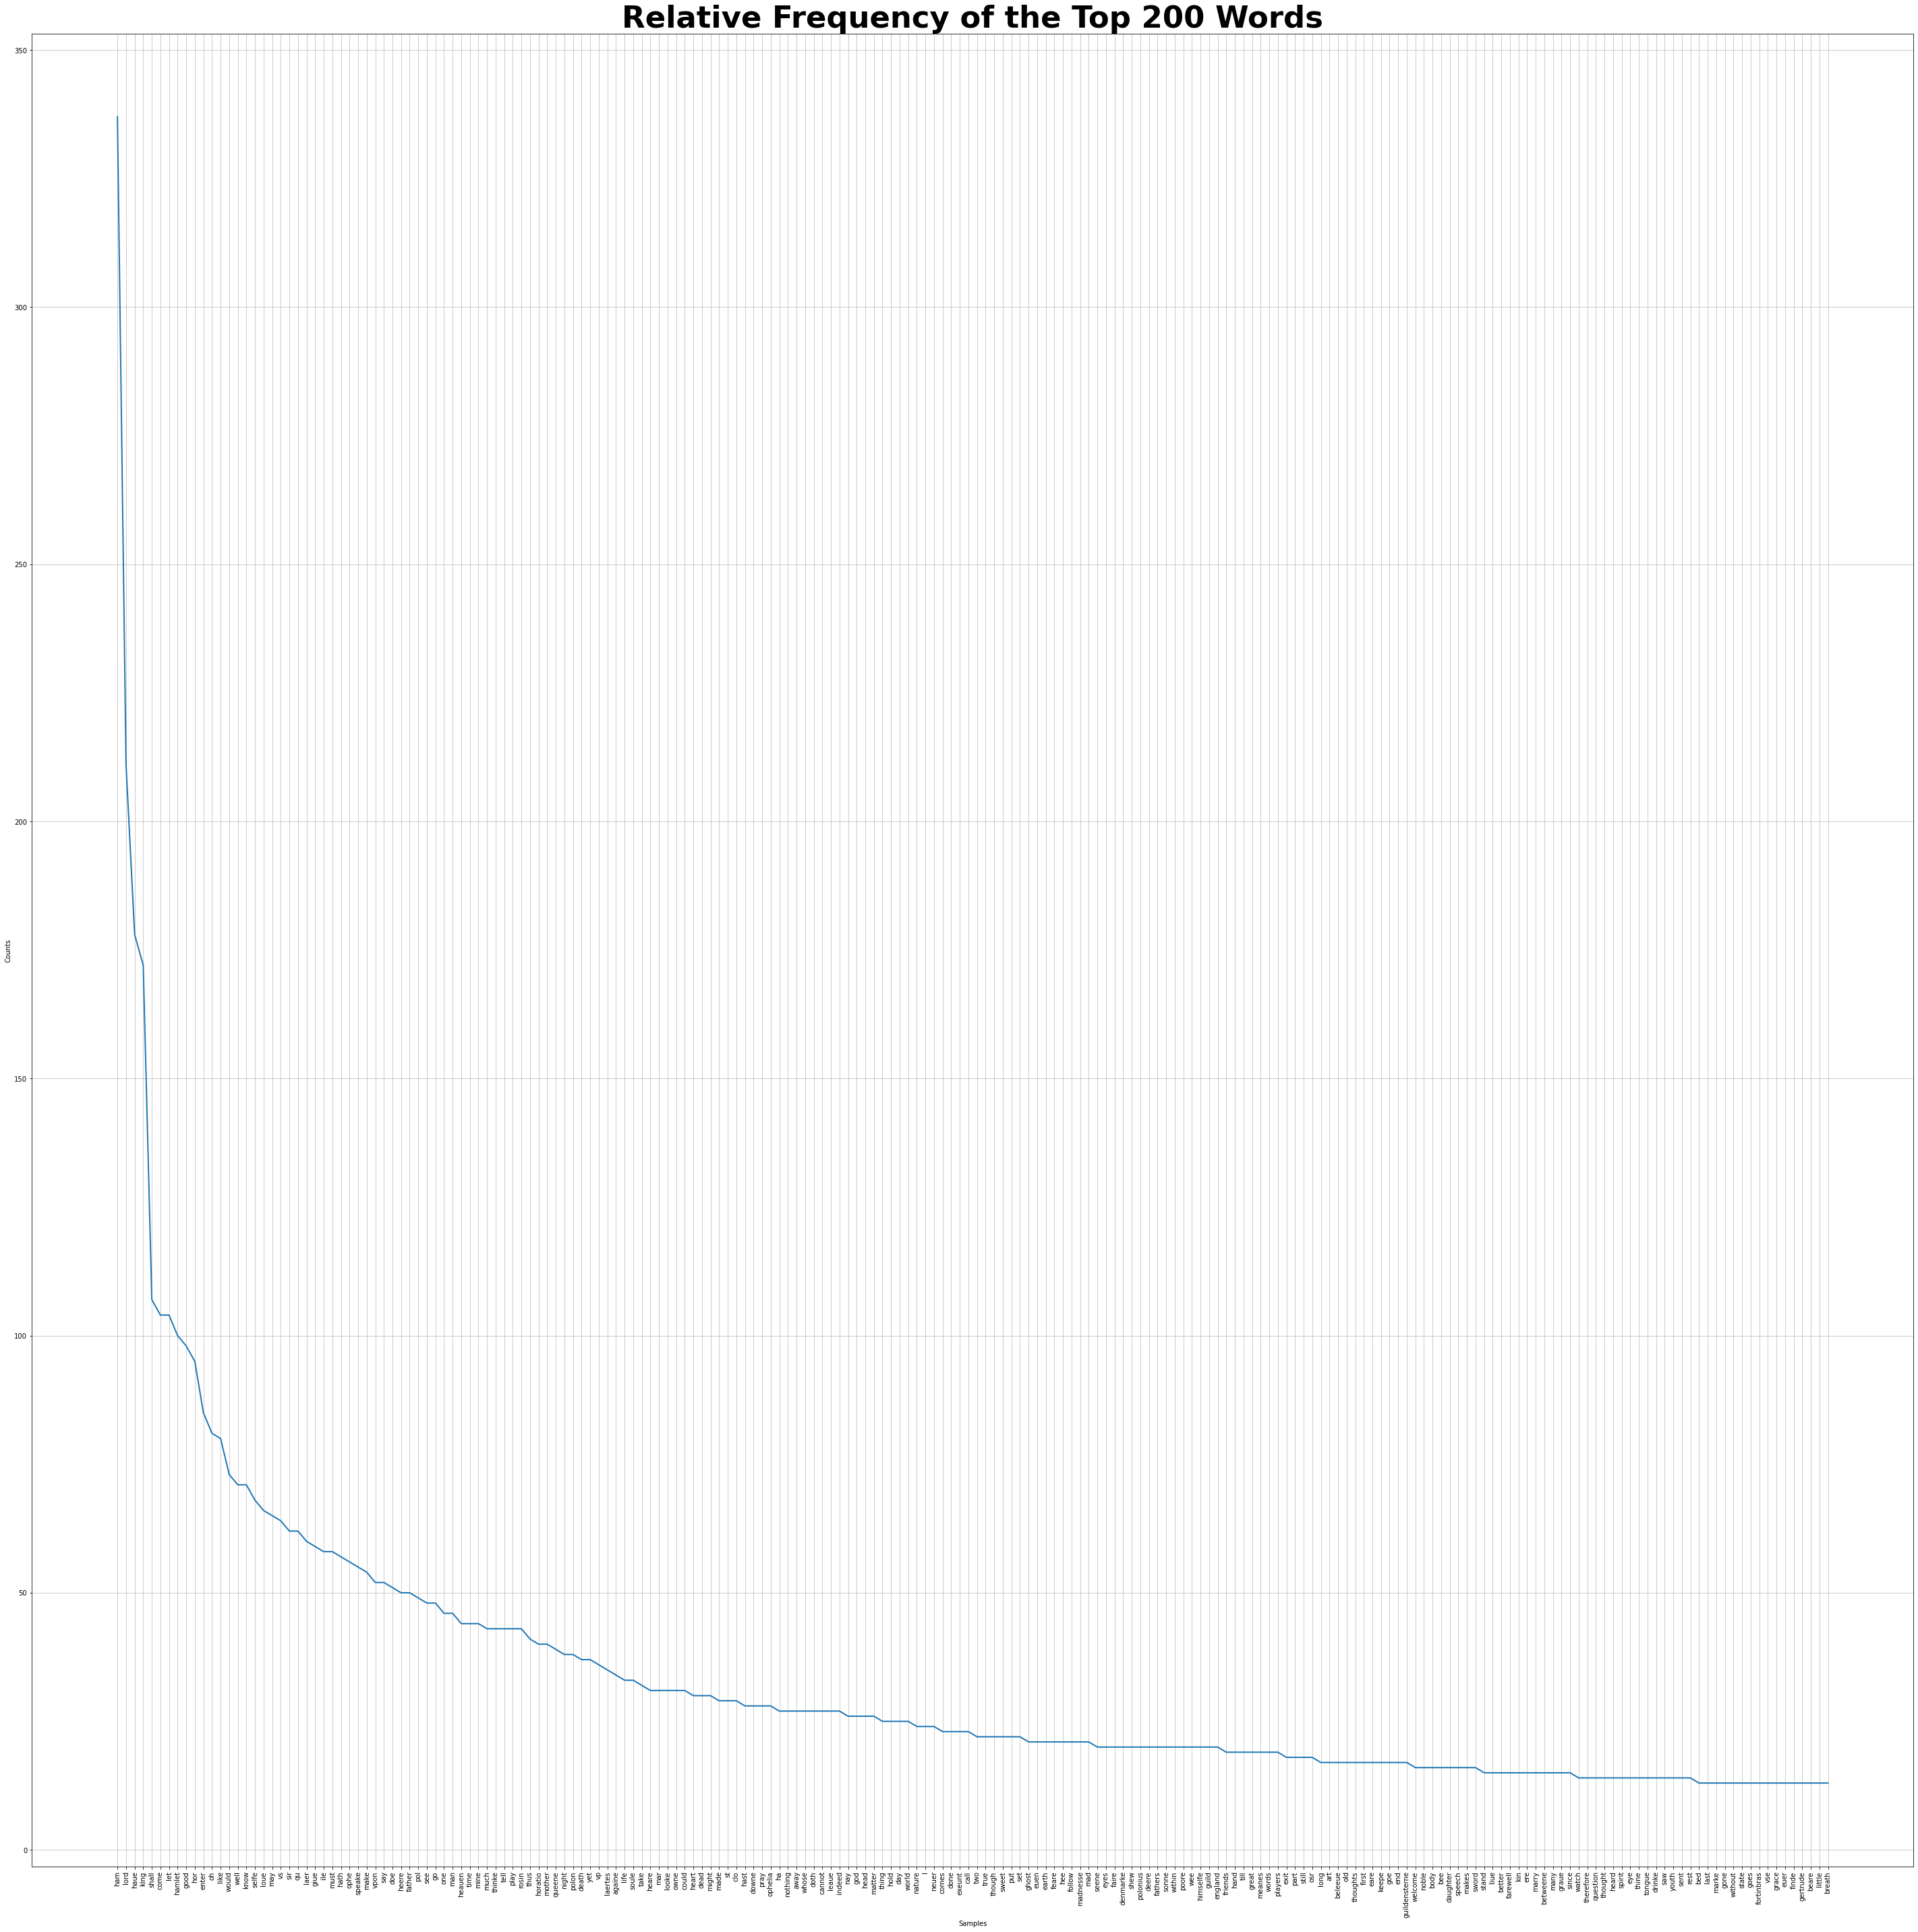

<AxesSubplot:title={'center':'Relative Frequency of the Top 200 Words'}, xlabel='Samples', ylabel='Counts'>

In [9]:
#Plot the relative frequency 
plt.figure(figsize=(50, 50))
plt.title("Relative Frequency of the Top 200 Words", fontdict= { 'fontsize': 45, 'fontweight':'bold'}, loc='center')
ch.plot(200)

### Zipf's Law

Zipf's Law establishes a relationship between the frequency distribution of words to their rank. We'll first establish a dataframe showing the top ranked words with their probabilities and frequencies.

In [38]:
# Create a dataframe of words from the top 80 words
zipf_list = []
r = 1
for word in ch:
  #print(r, ch[word]/total_L, (r*0.001*ch[word]/total_L))
  zipf_list.append( [word, ch[word], r, ch[word]/total_L, (r*0.001*ch[word]/total_L)] )
  r += 1
  if r > 80:
    break

import pandas as pd
zipf_df = pd.DataFrame(zipf_list, 
                       columns=['Word', 
                                'Frequency', 
                                'Rank', 
                                'Probability', 
                                'Rank*Probability(%)'])
zipf_df.head(10)


,Word,Frequency,Rank,Probability,Rank*Probability(%)
0,ham,337,1,0.026588,0.000027
1,lord,211,2,0.016647,0.000033
2,haue,178,3,0.014043,0.000042
3,king,172,4,0.013570,0.000054
4,shall,107,5,0.008442,0.000042
5,come,104,6,0.008205,0.000049
6,let,104,7,0.008205,0.000057
7,hamlet,100,8,0.007890,0.000063
8,good,98,9,0.007732,0.000070
9,hor,95,10,0.007495,0.000075


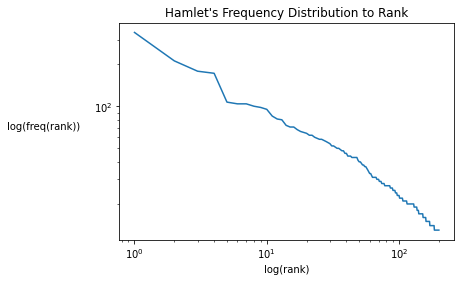

In [39]:
fig, ax = plt.subplots()

ax.set_xscale("log", nonpositive='clip')
ax.set_yscale("log", nonpositive='clip')
ax.set_xlabel('log(rank)')
ax.set_ylabel('log(freq(rank))', rotation=0, labelpad=50)
#plt.ylabel("y",labelpad=50)

plt.plot(zipf_df['Rank'], zipf_df['Frequency'])
plt.title("Hamlet's Frequency Distribution to Rank", loc='center')
plt.show()

# the plot generally shows a slope = -1 which means this corpus follows Zipf's law
# Reference = https://www.ccs.neu.edu/home/ekanou/ISU535.09X2/Handouts/Review_Material/zipfslaw.pdf



From the above the plot, The top 200 most frequent words follow the Zipf's law as the graph shows a negative exponential relationship between the ranks and its frequency. Words with a higher rank will have the higher frequency compared to those of a lower rank. Furthermore, the slope generally follows a line with a slope of -1. 

Because of this condition, we conclude the word frequencies agree with [Zipf's Law](https://www.ccs.neu.edu/home/ekanou/ISU535.09X2/Handouts/Review_Material/zipfslaw.pdf).

### Corpora frequencies and the corpus theme

The corpus frequencies are dependent on the theme of corpus and its sentiments. For example, our corpus top frequent words are in reference to the character's names and actions taken in Hamlet. Death was a highly frequent word in the text, which relates to the amount of deaths in Halmet. If this text was a romance novel, its freuqent words would be around love and have stronger sentiments with joy.

### This Corpus Compared to All Other Corpora

One question to think about is how the word frequencies in this corpus differ from other corpora. Obviously, since Shakespeare wrote Hamlet in England around 1600, the entire dictionary should vary widley with anything written in the US or from the last century. We do see highly frequent words such as 'ham' and 'haue' which have been replaced by 'home' and 'fence.' Other words relate to royalty and the central character which is reasonable given the story.

However, one subtle way this corpus shares with other corpora is the inclusion of terms from character dialogue. We know there are non-spoken passages in Hamlet but those sections do not contribute as much information or unigrams as the characters speeches.  To understand Hamlet (or Shakespeare in general), we have to examine what the characters say and how they interact with eachother rather than narrator or backgroun descriptions.